In [100]:
import tensorflow as tf
from tensorflow import keras
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

In [101]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
tf.random.set_seed(42)
np.random.seed(42)

In [102]:
path = "/Users/edlgg/repos/dissertation/images"

In [103]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [104]:
train_data_gen = image_generator.flow_from_directory(directory=str(path),
                                                     batch_size=32,
                                                     shuffle=True,
                                                     target_size=(140, 2000),
                                                     color_mode='grayscale')

Found 93496 images belonging to 1 classes.


In [108]:
codings_size = 50

generator = keras.models.Sequential([
    keras.layers.Dense(35 * 500 * 128, input_shape=[codings_size]),
    keras.layers.Reshape([35, 500, 128]),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(64, kernel_size=5, strides=2, padding="SAME",
                                 activation="selu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(1, kernel_size=5, strides=2, padding="SAME",
                                 activation="sigmoid"),
])
discriminator = keras.models.Sequential([
    keras.layers.Conv2D(64, kernel_size=5, strides=2, padding="SAME",
                        activation=keras.layers.LeakyReLU(0.2),
                        input_shape=[140, 2000, 1]),
    keras.layers.Dropout(0.4),
    keras.layers.Conv2D(128, kernel_size=5, strides=2, padding="SAME",
                        activation=keras.layers.LeakyReLU(0.2)),
    keras.layers.Dropout(0.4),
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation="sigmoid")
])
gan = keras.models.Sequential([generator, discriminator])

In [109]:
discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")
discriminator.trainable = False
gan.compile(loss="binary_crossentropy", optimizer="rmsprop")

In [124]:
def plot_multiple_images(images, n_cols=None):
    n_cols = n_cols or len(images)
    n_rows = (len(images) - 1) // n_cols + 1
    if images.shape[-1] == 1:
        images = np.squeeze(images, axis=-1)
    plt.figure(figsize=(n_cols, n_rows))
    for index, image in enumerate(images):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(image, cmap="binary")
        plt.axis("off")

In [125]:
def train_gan(gan, dataset, batch_size, codings_size, n_epochs):
    generator, discriminator = gan.layers
    for epoch in range(n_epochs):
        print("Epoch {}/{}".format(epoch + 1, n_epochs))            # not shown in the book
        for i in range(10):
            print(i)
            X_batch = next(dataset)[0]
            # phase 1 - training the discriminator
            noise = tf.random.normal(shape=[batch_size, codings_size])
            generated_images = generator(noise)
            X_fake_and_real = tf.concat([generated_images, X_batch], axis=0)
            y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
            discriminator.trainable = True
            discriminator.train_on_batch(X_fake_and_real, y1)
            # phase 2 - training the generator
            noise = tf.random.normal(shape=[batch_size, codings_size])
            y2 = tf.constant([[1.]] * batch_size)
            discriminator.trainable = False
            gan.train_on_batch(noise, y2)
        plot_multiple_images(generated_images, 8)                     # not shown
        plt.show()  

Epoch 1/5
0
1
2
3
4
5
6
7
8
9


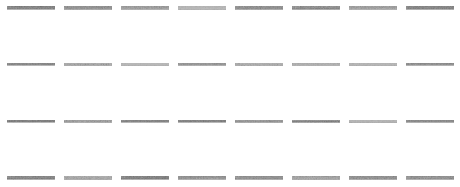

Epoch 2/5
0
1
2
3
4
5
6
7
8
9


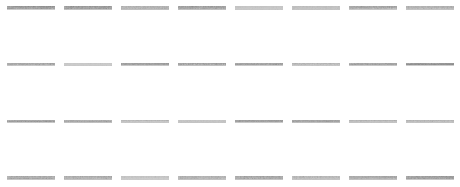

Epoch 3/5
0
1
2
3
4
5
6
7
8
9


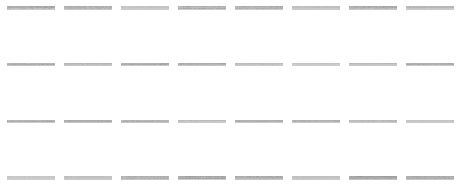

Epoch 4/5
0
1
2
3
4
5
6
7
8
9


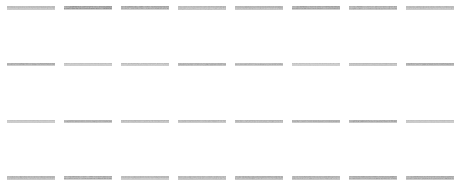

Epoch 5/5
0
1
2
3
4
5
6
7
8
9


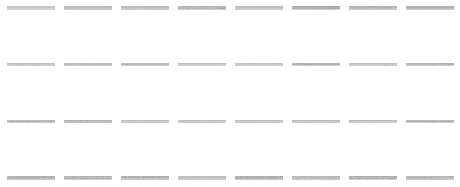

In [126]:
train_gan(gan, train_data_gen, 32, codings_size, 5)

In [127]:
generated_images = generator(noise)

In [129]:
image = generated_images[0]

In [136]:
image2 = image.numpy()

In [139]:
image3 = image2.squeeze()

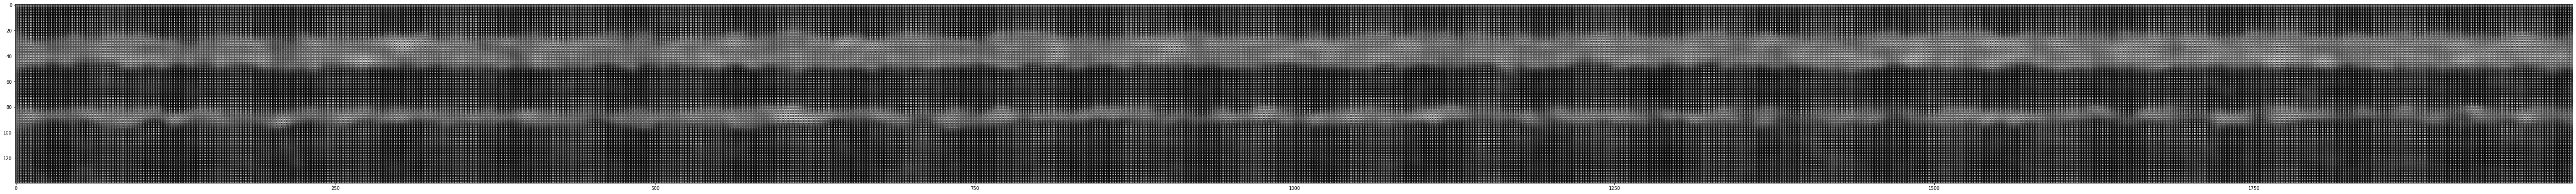

In [140]:
plt.figure(figsize=(100,300))
plt.imshow(image3, cmap='gray', interpolation='nearest')
plt.show()